In [2]:
import requests,json,os
import re,datetime
import shutil
import csv
import io
import matplotlib.pyplot as mp
nyt_article_search_key = os.getenv('auth_key')
art_url=('http://api.nytimes.com/svc/archive/v1/1992/4.json?api-key='+ nyt_article_search_key)
get_request=requests.get(art_url)
art=json.loads(get_request.text)
art['response']['docs'][0]

{'_id': '4fd19ee78eb7c8105d6b2652',
 'abstract': None,
 'blog': [],
 'byline': {'original': 'By LINDA GREENHOUSE',
  'person': [{'firstname': 'Linda',
    'lastname': 'GREENHOUSE',
    'organization': '',
    'rank': 1,
    'role': 'reported'}]},
 'document_type': 'article',
 'headline': {'main': 'Justices Ease Court Controls In School Desegregation Case'},
 'keywords': [{'name': 'persons', 'value': 'KENNEDY, ANTHONY M'},
  {'name': 'glocations', 'value': 'DE KALB COUNTY (GA)'},
  {'name': 'organizations', 'value': 'SUPREME COURT'},
  {'name': 'subject', 'value': 'EQUAL EDUCATIONAL OPPORTUNITIES'},
  {'name': 'subject', 'value': 'COURTS'},
  {'name': 'subject', 'value': 'EDUCATION AND SCHOOLS'},
  {'name': 'subject', 'value': 'DISCRIMINATION'}],
 'lead_paragraph': "Ruling in a major school desegregation case, the Supreme Court today gave hundreds of formerly segregated school districts a potential new legal tool for returning to local control after decades of operating under Federal co

In [3]:

with open('subVSyear.csv', 'w') as csvfile:        #Created a CSV file with the field names.
    fieldnames = ['Subject','Month', 'Year']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for folder in range(2012,2017):
        jpath ='Archive/'+str(folder)
        
        for root, dirs, files in os.walk(jpath):
        
            for f in files:
                if f.endswith('.json'):
    
                    with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
         
                        artdata=json.load(json_file)
                   
                        match = re.search(r'\d{4}-\d{2}-\d{2}', artdata['pub_date'])
                        date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
                    
                    for i in range(0,len(artdata['keywords'])):
                        if 'subject' in artdata['keywords'][i]['name']:
                
                            try:                               #Writing the data the CSV file.
                                writer.writerow({'Subject':artdata['keywords'][i]['value'],'Month':date.strftime("%b"), 'Year':date.year})
                            except (IndexError,KeyError):
                                pass


In [3]:
Terrorism=dict.fromkeys(range(2012,2017),0)
Police_Brut=dict.fromkeys(range(2012,2017),0)
Coll_Univ=dict.fromkeys(range(2012,2017),0)
Comp_Internet=dict.fromkeys(range(2012,2017),0)
Movies=dict.fromkeys(range(2012,2017),0)
Med_Health=dict.fromkeys(range(2012,2017),0)
Econ_Condt=dict.fromkeys(range(2012,2017),0)
Glob_Warm=dict.fromkeys(range(2012,2017),0)

In [4]:
for folder in range(2012,2017):
        jpath ='Archive/'+str(folder)
        
        for root, dirs, files in os.walk(jpath):
        
            for f in files:
                if f.endswith('.json'):
    
                    with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
         
                        artdata=json.load(json_file)
                   
                        match = re.search(r'\d{4}-\d{2}-\d{2}', artdata['pub_date'])
                        date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
                    
                    for i in range(0,len(artdata['keywords'])):
                        if 'subject' in artdata['keywords'][i]['name']:
                            if 'Terrorism' in artdata['keywords'][i]['value']:
                                Terrorism[date.year]+=1
                            if 'Police Brutality, Misconduct and Shootings' in artdata['keywords'][i]['value']:
                                Police_Brut[date.year]+=1
                            if 'Colleges and Universities' in artdata['keywords'][i]['value']:
                                Coll_Univ[date.year]+=1
                            if 'Computers and the Internet' in artdata['keywords'][i]['value']:
                                Comp_Internet[date.year]+=1
                            if 'Movies' in artdata['keywords'][i]['value']:
                                Movies[date.year]+=1
                            if 'Medicine and Health' in artdata['keywords'][i]['value']:
                                Med_Health[date.year]+=1
                            if 'Economic Conditions and Trends' in artdata['keywords'][i]['value']:
                                Econ_Condt[date.year]+=1
                            if 'Global Warming' in artdata['keywords'][i]['value']:
                                Glob_Warm[date.year]+=1


In [5]:
x=[]
ter=[]
mov=[]
pb=[]
cu=[]
ci=[]
mh=[]
ec=[]
gm=[]
for a in sorted(Terrorism):
    x.append(a)
    ter.append(Terrorism[a])
for a in sorted(Movies):
    mov.append(Movies[a])
for a in sorted(Police_Brut):
    pb.append(Police_Brut[a])
for a in sorted(Coll_Univ):
    cu.append(Coll_Univ[a])
for a in sorted(Comp_Internet):
    ci.append(Comp_Internet[a])
for a in sorted(Med_Health):
    mh.append(Med_Health[a])
for a in sorted(Glob_Warm):
    gm.append(Glob_Warm[a])
for a in sorted(Econ_Condt):
    ec.append(Econ_Condt[a])

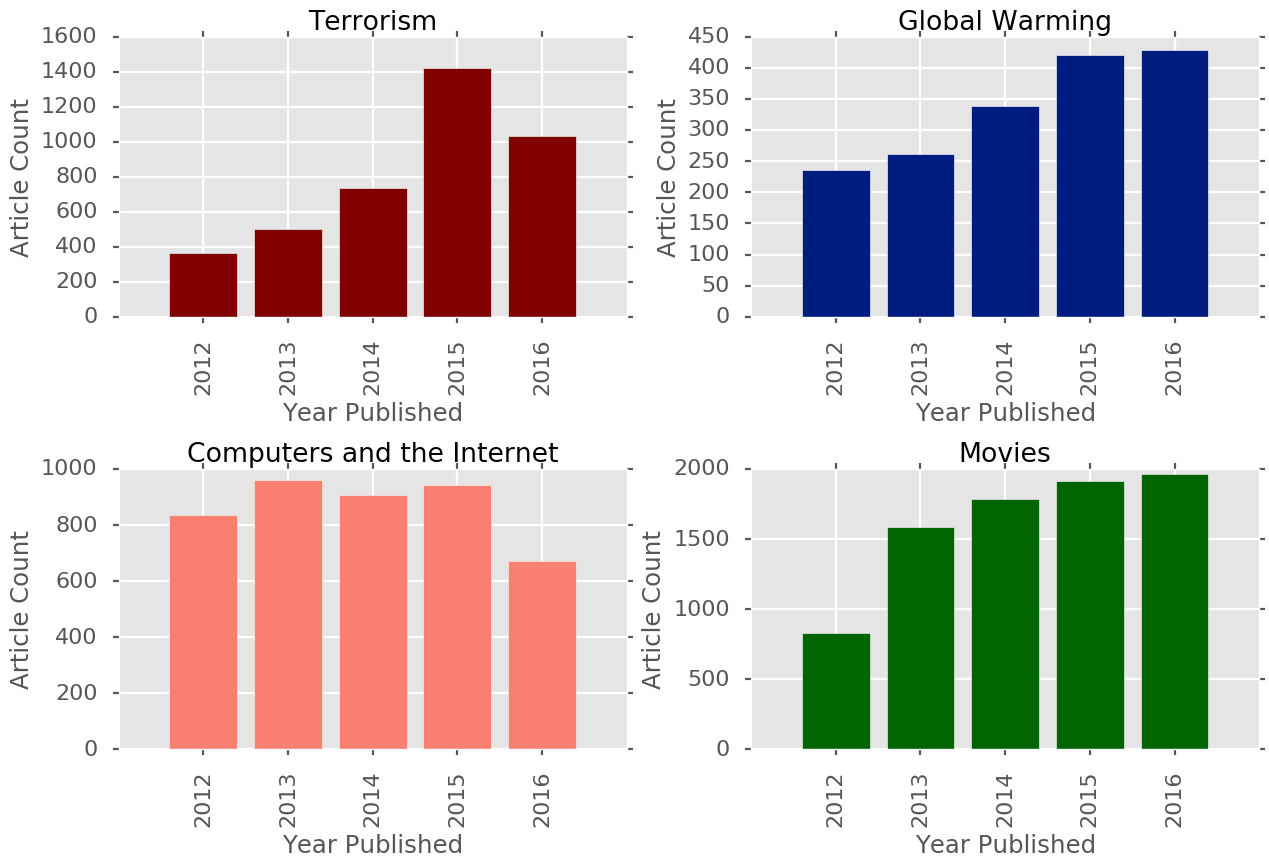

In [8]:
mp.style.use('ggplot')
mp.style.use('seaborn-dark-palette')
mp.style.use('seaborn-poster')

mp.subplot(221)
mp.bar(range(len(Terrorism)),ter,color='maroon',align='center')
mp.xticks(range(len(Terrorism)),x,rotation='vertical')
mp.title('Terrorism')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(224)
mp.bar(range(len(Movies)),mov,color='darkgreen',align='center')
mp.xticks(range(len(Movies)),x,rotation='vertical')
mp.title('Movies')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(223)
mp.bar(range(len(Comp_Internet)),ci,color='salmon',align='center')
mp.xticks(range(len(Comp_Internet)),x,rotation='vertical')
mp.title('Computers and the Internet')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(222)
mp.bar(range(len(Glob_Warm)),gm,align='center')
mp.xticks(range(len(Glob_Warm)),x,rotation='vertical')
mp.title('Global Warming')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.tight_layout()
mp.show()

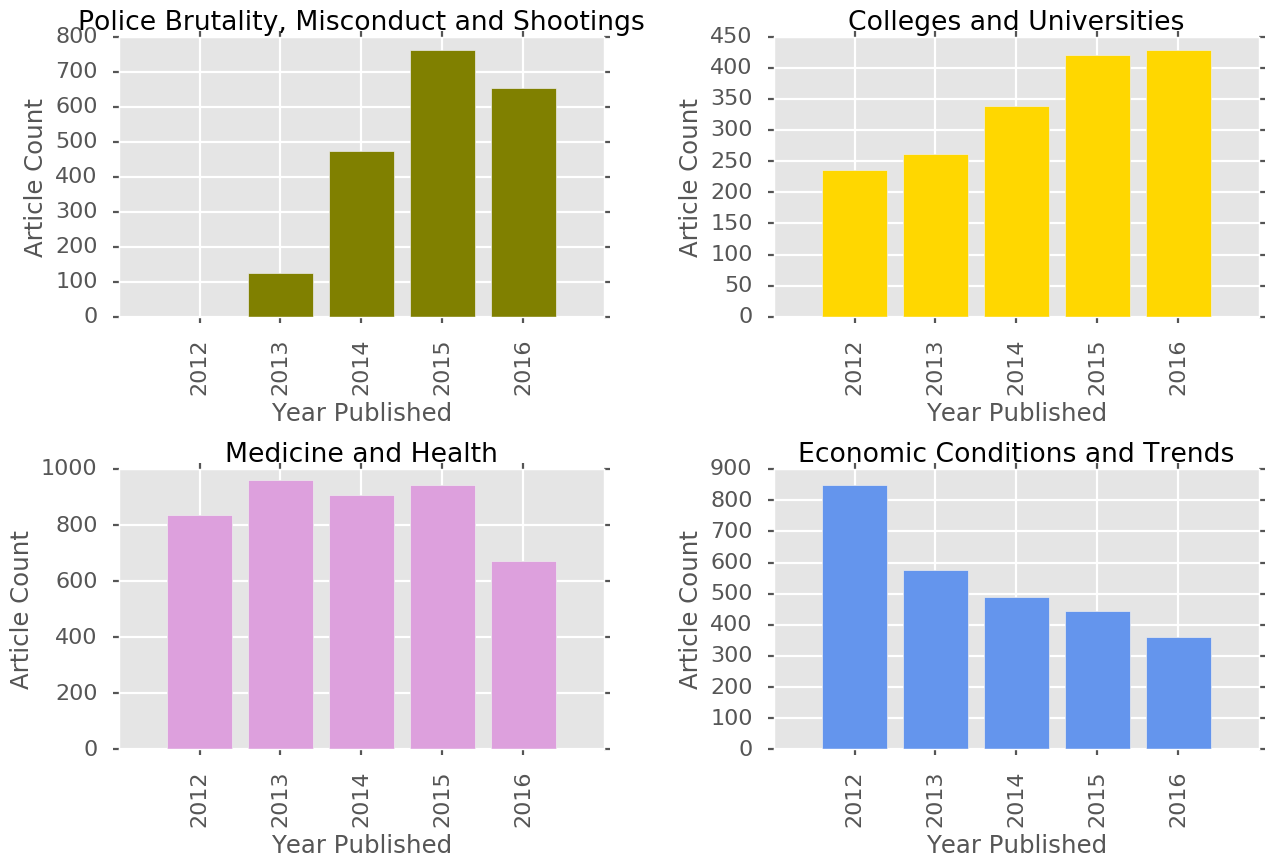

In [10]:
mp.style.use('ggplot')
mp.style.use('seaborn-dark-palette')
mp.style.use('seaborn-poster')

mp.subplot(221)
mp.bar(range(len(Police_Brut)),pb,color='olive',align='center')
mp.xticks(range(len(Police_Brut)),x,rotation='vertical')
mp.title('Police Brutality, Misconduct and Shootings')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(224)
mp.bar(range(len(Econ_Condt)),ec,color='cornflowerblue',align='center')
mp.xticks(range(len(Econ_Condt)),x,rotation='vertical')
mp.title('Economic Conditions and Trends')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(223)
mp.bar(range(len(Med_Health)),ci,color='plum',align='center')
mp.xticks(range(len(Med_Health)),x,rotation='vertical')
mp.title('Medicine and Health')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(222)
mp.bar(range(len(Coll_Univ)),gm,color='gold',align='center')
mp.xticks(range(len(Coll_Univ)),x,rotation='vertical')
mp.title('Colleges and Universities')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.tight_layout()
mp.show()